In [324]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd
import openpyxl
import scipy.optimize

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

# Histéresis magnética

In [325]:
def Error_relativo(X_real,X_exp):
    return (np.abs(X_exp - X_real)/X_real)

def presicion(d,v):
    p = (d/v)
    if p <= 0.1:
        return p,True
    else:
        return p,False
    
def exactitud(xr,xm,d):
    e = (np.abs(xr-xm))
    if e <= (2.5*d):
        return e/d,True
    else:
        return e/d,False

X = sym.Symbol('x',real=True)
Y = sym.Symbol('y',real=True)

In [326]:
def roots(x,y):
    i = 1
    while np.abs(y[-i]) <= np.abs(y[-i+1]):
        i += 1
        root = np.abs(x[-i])
    return root 

In [327]:
c = 299798458*1e09 #nm/s
c_ = 299798458 #m/s
me = 0.51099895*1e06/(c**2) #eV/c**2
me_ = 0.51099895*1e06/(c_**2) #eV/c**2
mp = 938.27208816*1e06/(c**2) #eV/c**2
mn = 939.56542052*1e06/(c**2) #eV/c**2
h = 4.136667696*1e-15 #eV*s
h_barra = 6.582119569*1e-16 #eV*s
e_0 = 55.26349406*1e-03 #e**2/(cV*nm)
e = 1 #e
a_0 = 0.0529177210903 #nm
Ry = 13.605693122994 #eV
Miu_B = 5.7883818066*1e-05 #eV/T

# Datos


In [328]:
wb = openpyxl.load_workbook(r"C:\Users\ASUS\OneDrive\Uniandes\Física\Física Moderna\Laboratorio-Moderna-GitHub\Histéresis Magnética\DatosHM.xlsx")
datos = pd.read_excel(io = r"C:\Users\ASUS\OneDrive\Uniandes\Física\Física Moderna\Laboratorio-Moderna-GitHub\Histéresis Magnética\DatosHM.xlsx", header=0,sheet_name='Hoja1',names=None,index_col=None,usecols='A:Q',skiprows=1,engine='openpyxl')
print(datos.head())

   I_A1 / A  &F / Vs  Unnamed: 2  I_A1 / A.1  &F / Vs.1  Unnamed: 5  \
0     0.001     0.00         NaN       0.002       0.00         NaN   
1     0.004     0.00         NaN       0.006       0.00         NaN   
2     0.005     0.00         NaN       0.015       0.00         NaN   
3     0.009    -0.01         NaN       0.030      -0.01         NaN   
4     0.013    -0.01         NaN       0.040      -0.01         NaN   

   I_A1 / A.2  &F / Vs.2  Unnamed: 8  I_A1 / A.3  &F / Vs.3  Unnamed: 11  \
0       0.169       0.00         NaN       0.002       0.00          NaN   
1       0.170       0.00         NaN       0.034       0.00          NaN   
2       0.140      -0.03         NaN       0.044      -0.01          NaN   
3       0.170      -0.08         NaN       0.091      -0.04          NaN   
4       0.193      -0.13         NaN       0.144      -0.09          NaN   

   I_A1 / A.4  &F / Vs.4  Unnamed: 14  I_A1 / A.5  &F / Vs.5  
0       0.010       0.00          NaN       0.170    

In [329]:
datos_ = datos.values
datos_np = np.float64(np.transpose(datos_))
I_1 = datos_np[0]
F_1 = datos_np[1]
I_2 = datos_np[3]
F_2 = datos_np[4]
I_3 = datos_np[6]
F_3 = datos_np[7]
I_4 = datos_np[9]
F_4 = datos_np[10]
I_5 = datos_np[12]
F_5 = datos_np[13]
I_6 = datos_np[15]
F_6 = datos_np[16]

N = 500
A = 0.001764 #m^2
L = 0.11 #m

B_1 = F_1/(N*A)*(-1)
H_1 = (N*I_1)/(L*10000)
B_2 = F_2/(N*A)*(-1)
H_2 = (N*I_2)/(L*10000)
B_3 = F_3/(N*A)*(-1)
H_3 = (N*I_3)/(L*10000)
B_4 = F_4/(N*A)*(-1)
H_4 = (N*I_4)/(L*1000)
B_5 = F_5/(N*A)*(-1)
H_5 = (N*I_5)/(L*1000)
B_6 = F_6/(N*A)*(-1)
H_6 = (N*I_6)/(L*1000)

B_1 = B_1[~np.isnan(B_1)]
H_1 = H_1[~np.isnan(H_1)]
B_2 = B_2[~np.isnan(B_2)]
H_2 = H_2[~np.isnan(H_2)]
B_3 = B_3[~np.isnan(B_3)]
H_3 = H_3[~np.isnan(H_3)]
B_4 = B_4[~np.isnan(B_4)]
H_4 = H_4[~np.isnan(H_4)]
B_5 = B_5[~np.isnan(B_5)]
H_5 = H_5[~np.isnan(H_5)]
B_6 = B_6[~np.isnan(B_6)]
H_6 = H_6[~np.isnan(H_6)]

Text(0.5, 1.0, 'Sierra: 2V, 0.1Hz')

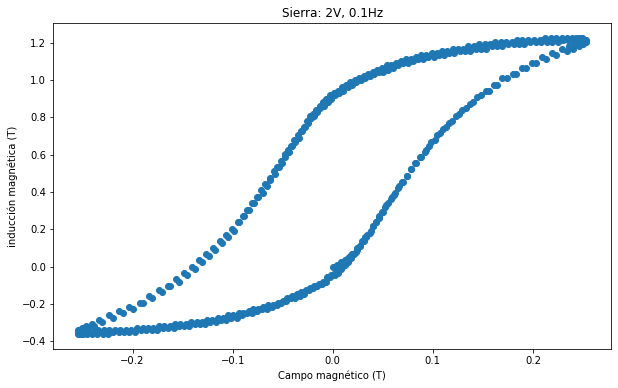

In [330]:
plt.figure(figsize=(10,6))
plt.scatter(H_1,B_1)
plt.ylabel('inducción magnética (T)')
plt.xlabel('Campo magnético (T)')
plt.title('Sierra: 2V, 0.1Hz')

In [331]:
B_1_ = B_1-(np.max(B_1)-(0.5*(np.max(B_1)-np.min(B_1))))
parametros = {'Bs':0.5*(np.max(B_1)-np.min(B_1)), 'Hs':0.5*(np.max(H_1)-np.min(H_1))}

In [332]:
roots(H_1,B_1_)

0.015909090909090907

In [333]:
H_1[np.where(H_1 == roots(H_1,B_1_))[0][0]]
B_1[np.where(H_1 == roots(H_1,B_1_))[0][0]-2] #No sirvió xd

-0.0

Text(0.5, 1.0, 'Sinosoidal: 2V, 0.1Hz')

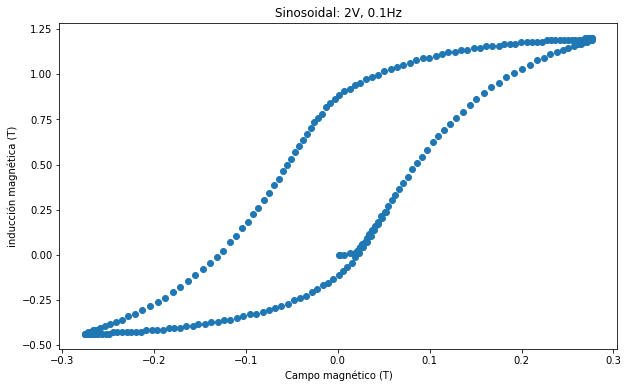

In [334]:
plt.figure(figsize=(10,6))
plt.scatter(H_2,B_2)
plt.ylabel('inducción magnética (T)')
plt.xlabel('Campo magnético (T)')
plt.title('Sinosoidal: 2V, 0.1Hz')

Text(0.5, 1.0, 'Cuadrada: 2V, 0.1 Hz')

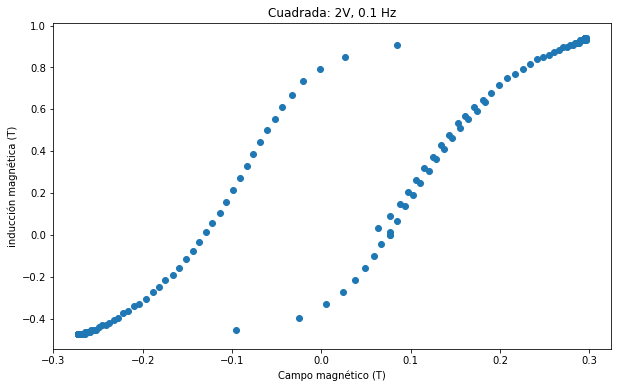

In [335]:
plt.figure(figsize=(10,6))
plt.scatter(H_3,B_3)
plt.ylabel('inducción magnética (T)')
plt.xlabel('Campo magnético (T)')
plt.title('Cuadrada: 2V, 0.1 Hz')

Text(0.5, 1.0, 'sierra: 2V, 1Hz')

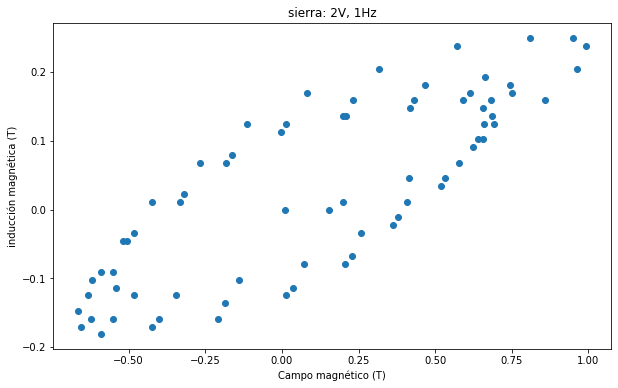

In [336]:
plt.figure(figsize=(10,6))
plt.scatter(H_4,B_4)
plt.ylabel('inducción magnética (T)')
plt.xlabel('Campo magnético (T)')
plt.title('sierra: 2V, 1Hz')

Text(0.5, 1.0, 'sinosoidal: 2V, 1Hz')

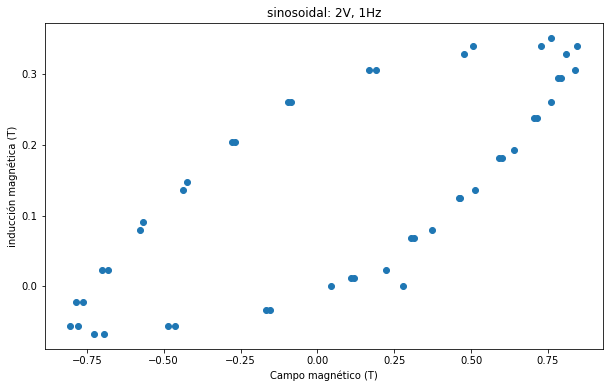

In [337]:
plt.figure(figsize=(10,6))
plt.scatter(H_5,B_5)
plt.ylabel('inducción magnética (T)')
plt.xlabel('Campo magnético (T)')
plt.title('sinosoidal: 2V, 1Hz')

Text(0.5, 1.0, 'cuadrada: 2V, 1 Hz')

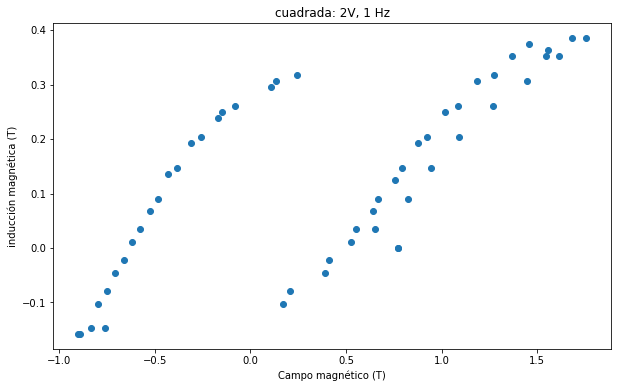

In [338]:
plt.figure(figsize=(10,6))
plt.scatter(H_6,B_6)
plt.ylabel('inducción magnética (T)')
plt.xlabel('Campo magnético (T)')
plt.title('cuadrada: 2V, 1 Hz')

# Áreas

In [339]:
ep = []

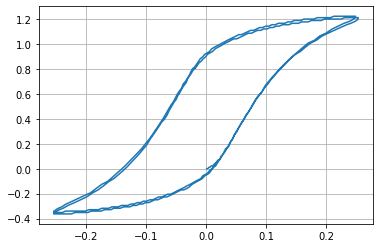

(0.4205988455988456, 0.1279147949095423)

In [340]:
plt.plot(H_1,B_1)
plt.grid(True)
plt.show()
mean = np.mean(B_1)
variance = np.trapz((B_1 - mean)**2, H_1) / (np.max(H_1) - np.min(H_1))
std_dev = np.sqrt(np.abs(variance))
ep.append(-np.trapz(B_1,H_1))
(-np.trapz(B_1,H_1),std_dev)

In [341]:
presicion(std_dev,-np.trapz(B_1,H_1))

(0.3041254065436583, False)

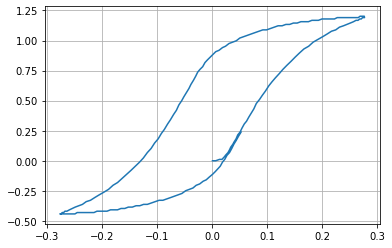

(0.22295403009688722, 0.07633758540582658)

In [342]:
plt.plot(H_2,B_2)
plt.grid(True)
plt.show()
mean = np.mean(B_2)
variance = np.trapz((B_2 - mean)**2, H_2) / (np.max(H_2) - np.min(H_2))
std_dev = np.sqrt(np.abs(variance))
ep.append(-np.trapz(B_2,H_2))
(-np.trapz(B_2,H_2),std_dev)

In [343]:
presicion(std_dev,-np.trapz(B_2,H_2))

(0.342391592440169, False)

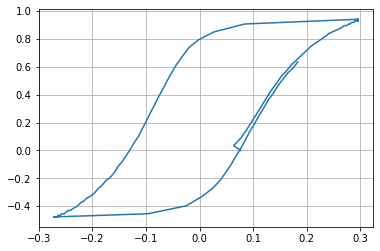

(0.24811379097093386, 0.16028832117137426)

In [344]:
plt.plot(H_3,B_3)
plt.grid(True)
plt.show()
mean = np.mean(B_3)
variance = np.trapz((B_3 - mean)**2, H_3) / (np.max(H_3) - np.min(H_3))
std_dev = np.sqrt(np.abs(variance))
ep.append(-np.trapz(B_3,H_3))
(-np.trapz(B_3,H_3),std_dev)

In [345]:
presicion(std_dev,-np.trapz(B_3,H_3))

(0.6460274559673782, False)

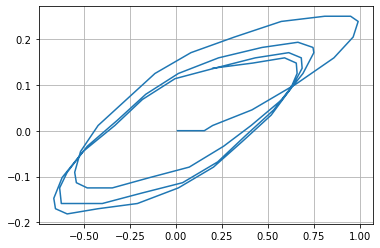

(0.7669037311894455, 0.052985150322463086)

In [346]:
plt.plot(H_4,B_4)
plt.grid(True)
plt.show()
mean = np.mean(B_4)
variance = np.trapz((B_4 - mean)**2, H_4) / (np.max(H_4) - np.min(H_4))
std_dev = np.sqrt(np.abs(variance))
ep.append(-np.trapz(B_4,H_4))
(-np.trapz(B_4,H_4),std_dev)

In [347]:
presicion(std_dev,-np.trapz(B_4,H_4))

(0.06908970209374865, True)

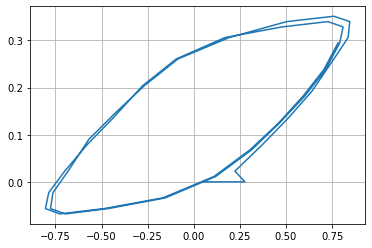

(0.5632086167800453, 0.02120710070134574)

In [348]:
plt.plot(H_5,B_5)
plt.grid(True)
plt.show()
mean = np.mean(B_5)
variance = np.trapz((B_5 - mean)**2, H_5) / (np.max(H_5) - np.min(H_5))
std_dev = np.sqrt(np.abs(variance))
ep.append(-np.trapz(B_5,H_5))
(-np.trapz(B_5,H_5),std_dev)

In [349]:
presicion(std_dev,-np.trapz(B_5,H_5))

(0.037654077138574625, True)

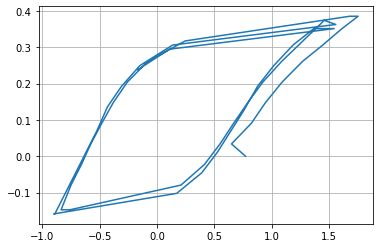

(1.4030354566068852, 0.053956747006665036)

In [350]:
plt.plot(H_6,B_6)
plt.grid(True)
plt.show()
mean = np.mean(B_6)
variance = np.trapz((B_6 - mean)**2, H_6) / (np.max(H_6) - np.min(H_6))
std_dev = np.sqrt(np.abs(variance))
ep.append(-np.trapz(B_6,H_6))
(-np.trapz(B_6,H_6),std_dev)

In [351]:
presicion(std_dev,-np.trapz(B_6,H_6))

(0.0384571514230685, True)

In [353]:
np.sum(ep)/len(ep)

0.6041357452071737